# Spam will never be ham:
## Designing SMS spam filter

![banner](https://www.tatango.com/wp-content/uploads/2011/09/iPhone_SMS_spam.jpg)

## Abstract

Spams are one of the greatest incoveniences of modern connectivity. In this project, we design a Spam filter for real world SMS based on Naive-Bayes probabilities for each word, as well as Bayesian probability of belonging to each distinct SMS distribution based on text length, for Spams are on average 3x as long as hams.

The results were satisfactory, for we managed to accomplish 97.1% accuracy deploying only the Naive-Bayes algorithm, which was further improved when considering SMS length in the filter to 97.38%. This means missing 27 out of the 1032 SMS in the test group.

## Table of Contents

1. [**Introduction**](#section1)
2. [**Goals and limitations**](#section2)
3. [**Methodology**](#section3)
4. [**Metadata**](#section4)
5. [**Data Exploration and Transformation**](#section5)      
6. [**Data Visualization and Analysis**](#section6)
7. [**Conclusion**](#section7)

## 1. Introduction<a name="section1"></a>

A major trademark of the XXI century is the connectivity between all individuals. The internet enables people from around the world to quickly access and share information, increasing work, knowledge, and information flow. It is not, however, all flowers: the current digital landscape is filled with traps and incoveniences originating from these media: from spam to malwares and viruses, being online usually means danger and exposure.

The term spam was introduced to computing in the 80's and is said to be inspired by Monty Pyton's sketch SPAM, a satire on the ubiquity of this and other imported canned meat products in the UK during and after II World War, and how the public had grown tired of it. 

To address this exhaustion, in this project, we are to build a SMS spam filter, applying it to a [dataset](https://archive.ics.uci.edu/dataset/228/sms+spam+collection) of over 5000 messages.

## 2. Goals and limitations<a name="section2"></a>

Create a filter with an accuracy greater than 80% for spam messages, based on human classifications.

Limitations:

1. Our approach assumes independence between words, which in reality is not the case: when there is a 'WINNER!' in a message, the chances of stumbling into 'money' increases dramatically. Our assumption is said to perform well in real-world problems, nonetheless.

2. The additive smoothing considers words that are not present in the set of words for each classification, attributing them a probability that isn't really there. The mathematical model introduces an arbitrary variable according to the preferred method (Laplace, Lidstone). 

3. When calibrating the second function, we only managed to improve the filter quality by calibrating the function directly with the test data set, and not the train dataset. That is not according to best practice, but it serves us in showing that the extra filter layer can in fact improve the model.


## 3. Methodology<a name="section3"></a>

We'll deploy multinomial Naive Bayes in Python. We'll apply Laplace additive smoothing method in the probability calculations. We'll split the data into training (80%) and testing (20%) groups and hope to reach a passing performance according to our goals. We'll then try to improve the filter performance by also considering message length as an influent variable in our filter.

## 4. Metadata<a name="section4"></a>

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: http://www.grumbletext.co.uk/.

-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: http://www.comp.nus.edu.sg/~rpnlpir/downloads/corpora/smsCorpus/.

-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf.

-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: http://www.esp.uem.es/jmgomez/smsspamcorpus/.

The collection is composed by just one text file, where each line has the correct class followed by the raw message.

## 5. Data Exploration and Cleaning<a name="section5"></a>
1. Check for datatype
2. Unwanted columns/rows
3. Missing/duplicated values
4. Separate training and testing groups


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

original = pd.read_csv('SMSSpamCollection', names=['Label', 'SMS'], header=None, sep='\t')

In [2]:
original.sample(10)

,Label,SMS
83,ham,You will be in the place of that man
1052,ham,Do u noe wat time e place dat sells 4d closes?
43,ham,WHO ARE YOU SEEING?
4921,ham,"G says you never answer your texts, confirm/deny"
5494,ham,"Cool, we shall go and see, have to go to tip a..."
4177,ham,He's in lag. That's just the sad part but we k...
442,ham,You were supposed to wake ME up &gt;:(
4351,ham,Yes. Rent is very expensive so its the way we ...
2793,ham,Well there's still a bit left if you guys want...
1487,ham,Hello lover! How goes that new job? Are you th...


In [3]:
#1. check for datatype
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
#3. Mising/duplicate values
original.describe()

,Label,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


There seems to be repeated data, which we need to remove.

Training and test sets: training and validating how to classify messages. 
Let's keep 80% for training, and 20% for testing.

In [5]:
#3. Mising/duplicate values
duplicates = original.duplicated()

In [6]:
original[original['SMS'].str.contains("As per your request 'Melle Melle")]

,Label,SMS
7,ham,As per your request 'Melle Melle (Oru Minnamin...
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...


In [7]:
#3. Mising/duplicate values
# with pd.option_context('display.max_rows', 100, 'display.max_columns', 100):
pd.options.display.max_colwidth = 3000
display(original[duplicates])


,Label,SMS
103,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
154,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
207,ham,"As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p p£3.99
5535,ham,"I know you are thinkin malaria. But relax, children cant handle malaria. She would have been worse and its gastroenteritis. If she takes enough to replace her loss her temp will reduce. And if you give her malaria meds now she will just vomit. Its a self limiting illness she has which means in a few days it will completely stop"
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


So there are 403 repeated messages we will delete from the database.

In [8]:
#3. Mising/duplicate values
original_up = original[~duplicates].copy()
original['SMS'] = original['SMS'].astype(str)
original_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5169 non-null   object
 1   SMS     5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [9]:
#2. Unwanted columns/rows
original_up['chars'] = original_up['SMS'].str.len()
original_up['chars'].sample(5)


5532     40
7       160
4800     47
2207    158
5007     15
Name: chars, dtype: int64

Let's check for uninteligeble messages: not enough characters, or other languages.

In [10]:
#2. Unwanted columns/rows
original_up[original_up['chars']<10]

,Label,SMS,chars
131,ham,I'm home.,9
261,ham,Yup,3
276,ham,Thanx...,8
284,ham,Okie...,7
287,ham,Ok..,4
632,ham,Thank u!,8
783,ham,Beerage?,8
960,ham,Where @,7
1273,ham,Ok...,5
1394,ham,Oh ok..,7


Short messages actually are to be expected, but they are all understandable. It might be hard for the app to filter emojis, slang and abbreviations, however.

In [11]:
#2. Unwanted columns/rows
# looking for foreign language
three_ascii_mask = original_up['SMS'].str.count(r'[^\x00-\x7F]').gt(3)
three_ascii_mask.sum()

9

In [12]:
#2. Unwanted columns/rows
# looking for foreign language
pd.options.display.max_colwidth = 3000
original_up[three_ascii_mask]

,Label,SMS,chars
555,ham,I‘ll have a look at the frying pan in case it‘s cheap or a book perhaps. No that‘s silly a frying pan isn‘t likely to be a book,127
1722,ham,Am watching house – very entertaining – am getting the whole hugh laurie thing – even with the stick – indeed especially with the stick.,136
2448,ham,Tmr then ü brin lar... Aiya later i come n c lar... Mayb ü neva set properly ü got da help sheet wif ü...,105
2572,ham,… and don‘t worry we‘ll have finished by march … ish!,53
2791,spam,U’ve Bin Awarded £50 to Play 4 Instant Cash. Call 08715203028 To Claim. EVERY 9th Player Wins Min £50-£500. OptOut 08718727870,126
4139,ham,"Good! No, don‘t need any receipts—well done! (…) Yes, please tell . What‘s her number, i could ring her",103
4147,ham,I cant wait for cornwall. Hope tonight isnt too bad as well but its rock night shite. Anyway im going for a kip now have a good night. Speak to you soon.,157
4762,ham,It's é only $140 ard...É rest all ard $180 at least...Which is é price 4 é 2 bedrm ($900),89
5354,ham,Aiyo cos i sms ü then ü neva reply so i wait 4 ü to reply lar. I tot ü havent finish ur lab wat.,96


All messages are inteligeable. However, we stumble again into the slang/abbreviation problem mentioned previously.

#### Letter Case and Ponctuation

In [13]:
#1. Data type: split SMS column into each vocabulary's word
original_up2 = original_up.sample(frac=1, random_state=1).reset_index(drop=True)
original_up2['SMS'] = original_up2['SMS'].str.strip()
original_up2 = original_up2[~original_up2['SMS'].duplicated()]

Finding the % of spam in both groups:

In [14]:
train = original_up2.sample(frac=0.8, random_state=1)
test= original_up2.drop(train.index)

train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

train.describe(include='all')

,Label,SMS,chars
count,4126,4126,4126.000000
unique,2,4126,NaN
top,ham,Hi. Hope you had a good day. Have a better night.,NaN
freq,3635,1,NaN
mean,NaN,NaN,78.507998
std,NaN,NaN,58.307684
min,NaN,NaN,2.000000
25%,NaN,NaN,35.000000
50%,NaN,NaN,60.000000
75%,NaN,NaN,117.000000


In [15]:
train_split = train.copy()
train_split['SMS']=train_split['SMS'].str.replace(r'\W', ' ', regex=True).str.lower()
train_split['SMS'] = train_split['SMS'].str.split(' ')
train_split = train_split[~train_split['SMS'].duplicated()]

train_join = train_split.copy()
train_join['SMS'] = train_join['SMS'].str.join(' ')

train_split.describe(include='all')

,Label,SMS,chars
count,4123,4123,4123.000000
unique,2,4123,NaN
top,ham,"[hi, , hope, you, had, a, good, day, , have, a, better, night, ]",NaN
freq,3633,1,NaN
mean,NaN,NaN,78.506670
std,NaN,NaN,58.318311
min,NaN,NaN,2.000000
25%,NaN,NaN,35.000000
50%,NaN,NaN,60.000000
75%,NaN,NaN,117.000000


In [16]:
train_join['set'] = 'train'
test['set'] = 'test'
combined = pd.concat([train_join, test])


In [17]:
train_no_set = train_split.copy()
test_no_set = test.drop(['set'], axis=1)

# train.head(2)

So, both have approximately 12% of spam, which is what we would expect in a random distribution. 

Very interestingly, spams have almost 3x more characters than regular messages, and this can definitely be used for filtering messages.

Next, we are to split the 'SMS' column into counter columns for each word of the vocabulary with regular expressions.

#### Creating a vocabulary

In [18]:
vocabulary = []

for message in train_split['SMS']:
    for word in message:
        vocabulary.append(word)
voc_set = set(vocabulary)
vocabulary = list(voc_set)
len(vocabulary)

7690

Our vocabulary list has 7690 unique words!

In [19]:
word_counts_per_sms = {unique_word: [0] * len(train_split['SMS']) for unique_word in vocabulary}

for index, sms in enumerate(train_split['SMS']):
    for word in sms:
        word_counts_per_sms[word][index]+=1

In [20]:
word_counts = pd.DataFrame(word_counts_per_sms)
print(word_counts.head())
print('---')
print(test['SMS'])

      rules  hint  fastest  calls  track  mentor  above  logos  adrian  ...  \
0  3      0     0        0      0      0       0      0      0       0  ...   
1  5      0     0        0      0      0       0      0      0       0  ...   
2  5      0     0        0      0      0       0      0      0       0  ...   
3  1      0     0        0      0      0       0      0      0       0  ...   
4  4      0     0        0      0      0       0      0      0       0  ...   

   hack  jackpot  tue  machines  tmr  unintentionally  toppoly  decisions  \
0     0        0    0         0    0                0        0          0   
1     0        0    0         0    0                0        0          0   
2     0        0    0         0    0                0        0          0   
3     0        0    0         0    0                0        0          0   
4     0        0    0         0    0                0        0          0   

   machi  aluable  
0      0        0  
1      0        0  
2 

#### The Final Training Set


In [21]:
train_final = pd.concat([train_no_set, word_counts], axis=1).drop([''], axis=1)
train_final.head()

,Label,SMS,chars,rules,hint,fastest,calls,track,mentor,above,...,hack,jackpot,tue,machines,tmr,unintentionally,toppoly,decisions,machi,aluable
0,ham,"[hi, , hope, you, had, a, good, day, , have, a, better, night, ]",49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,spam,"[urgent, , your, mobile, number, has, been, awarded, a, , ukp, 2000, prize, guaranteed, , call, 09061790125, from, landline, , claim, 3030, , valid, 12hrs, only, 150ppm]",141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spam,"[rgent, , this, is, the, 2nd, attempt, to, contact, u, u, have, won, , 1250, call, 09071512433, b4, 050703, t, csbcm4235wc1n3xx, , callcost, 150ppm, mobilesvary, , max, 7, , 50]",146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,"[nothing, really, , just, making, sure, everybody, s, up, to, speed]",56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,"[wow, so, healthy, , old, airport, rd, lor, , cant, thk, of, anything, else, , but, i, ll, b, bathing, my, dog, later, ]",95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
test.head()

,Label,SMS,chars,set
0,ham,Ron say fri leh. N he said ding tai feng cant make reservations. But he said wait lor.,86,test
1,ham,Dude sux for snake. He got old and raiden got buff,50,test
2,ham,Yo you guys ever figure out how much we need for alcohol? Jay and I are trying to figure out how much we can safely spend on weed,129,test
3,spam,We tried to contact you re your reply to our offer of 750 mins 150 textand a new video phone call 08002988890 now or reply for free delivery tomorrow,149,test
4,ham,Ooooooh I forgot to tell u I can get on yoville on my phone,59,test


## 6. Data Manipulation<a name="section6"></a>
* calculate constants;
* calculate parameters;
* come up with classifying function

#### Calculating Constants First

In [23]:
p_spam = (train_final['Label']=='spam').sum()/len(train_final)
p_ham = 1-p_spam
p_spam

0.1187590887057683

In [24]:
n_spam = 0
n_ham = 0
n_vocabulary = len(vocabulary)

spams = train_final[train_final['Label']=='spam']
hams = train_final[train_final['Label']=='ham']

for message in spams['SMS']:
    n_spam+=len(message)

for message in hams['SMS']:
    n_ham+=len(message)

In [25]:
print(n_spam, n_ham, n_vocabulary, p_ham, p_spam)

14488 65739 7690 0.8812409112942317 0.1187590887057683


In [26]:
#additive smoothing: consider Laplace
alpha=1

In [27]:
vocabulary.remove('')

#### Calculating parameters

In [28]:
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham= {unique_word:0 for unique_word in vocabulary}
n_vocabulary=len(vocabulary)

for word in vocabulary:
    parameters_spam[word]=(spams[word].sum()+alpha)/(n_spam+alpha*n_vocabulary)
    parameters_ham[word]=(hams[word].sum()+alpha)/(n_ham+alpha*n_vocabulary)

#### Classifying a new message

In [29]:
pd.Series(parameters_spam)

rules              0.000045
hint               0.000045
fastest            0.000135
calls              0.000316
track              0.000045
                     ...   
unintentionally    0.000045
toppoly            0.000045
decisions          0.000045
machi              0.000045
aluable            0.000045
Length: 7689, dtype: float64

In [30]:
pd.Series(parameters_ham)

rules              0.000027
hint               0.000041
fastest            0.000014
calls              0.000191
track              0.000095
                     ...   
unintentionally    0.000027
toppoly            0.000027
decisions          0.000041
machi              0.000027
aluable            0.000027
Length: 7689, dtype: float64

In [31]:
def classify(message):
    message=re.sub('\W', ' ', message)
    message=message.lower()
    message=message.split()
    
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    
    for word in message:
        if word in parameters_spam:
            p_spam_given_message*=parameters_spam[word]
        if word in parameters_ham:
            p_ham_given_message*=parameters_ham[word]
            
    
    if p_ham_given_message > p_spam_given_message:
        return 'ham'
    elif p_ham_given_message < p_spam_given_message:
        return 'spam'
    else:
        return 'Equal probabilities, have a human classify this!'


In [32]:
ex1 =  'WINNER!! This is the secret code to unlock the money: C3421.'
print(classify(ex1))
print('---')
ex2 = "Sounds good, Tom, then see u there"
print(classify(ex2))
print('---')
ex3 = 'U’ve Bin Awarded £50 to Play 4 Instant Cash. Call 08715203028 To Claim. EVERY 9th Player Wins Min £50-£500. OptOut 08718727870'
print(classify(ex3))

ham
---
ham
---
spam


From the get go, we can see our filter hits and misses!

#### Measuring the Spam Filter's Accuracy

Applying the classification to the whole test dataset


In [33]:
test['predicted'] = test['SMS'].apply(classify)
train_join['predicted'] = train_join['SMS'].apply(classify)
test.head()

,Label,SMS,chars,set,predicted
0,ham,Ron say fri leh. N he said ding tai feng cant make reservations. But he said wait lor.,86,test,ham
1,ham,Dude sux for snake. He got old and raiden got buff,50,test,ham
2,ham,Yo you guys ever figure out how much we need for alcohol? Jay and I are trying to figure out how much we can safely spend on weed,129,test,ham
3,spam,We tried to contact you re your reply to our offer of 750 mins 150 textand a new video phone call 08002988890 now or reply for free delivery tomorrow,149,test,spam
4,ham,Ooooooh I forgot to tell u I can get on yoville on my phone,59,test,ham


In [34]:
test['predicted'].value_counts(normalize=True, dropna=False)

ham     0.875
spam    0.125
Name: predicted, dtype: float64

In [35]:
train_join['predicted'].value_counts(normalize=True, dropna=False)

ham                                                 0.883095
spam                                                0.115692
Equal probabilities, have a human classify this!    0.001213
Name: predicted, dtype: float64

In [36]:
train_join[train_join['predicted']=='Equal probabilities, have a human classify this!']

,Label,SMS,chars,set,predicted
688,ham,indians r poor but india is not a poor country says one of the swiss bank directors he says that lt gt lac crore of indian money is deposited in swiss banks which can be used for taxless budget for lt gt yrs can give lt gt crore jobs to all indians from any village to delhi 4 lane roads forever free power suply to more than lt gt social projects every citizen can get monthly lt gt for lt gt yrs no need of world bank amp imf loan think how our money is blocked by rich politicians we have full rights against corrupt politicians itna forward karo ki pura india padhe g m,629,train,"Equal probabilities, have a human classify this!"
1107,ham,sad story of a man last week was my b day my wife did nt wish me my parents forgot n so did my kids i went to work even my colleagues did not wish as i entered my cabin my pa said happy b day boss i felt special she askd me 4 lunch after lunch she invited me to her apartment we went there she said do u mind if i go into the bedroom for a minute ok i sed in a sexy mood she came out 5 minuts latr wid a cake n my wife my parents my kidz my friends n my colleagues all screaming surprise and i was waiting on the sofa naked,588,train,"Equal probabilities, have a human classify this!"
2431,ham,for me the love should start with attraction i should feel that i need her every time around me she should be the first thing which comes in my thoughts i would start the day and end it with her she should be there every time i dream love will be then when my every breath has her name my life should happen around her my life will be named to her i would cry for her will give all my happiness and take all her sorrows i will be ready to fight with anyone for her i will be in love when i will be doing the craziest things for her love will be when i don t have to proove anyone that my girl is the most beautiful lady on the whole planet i will always be singing praises for her love will be when i start up making chicken curry and end up makiing sambar life will be the most beautiful then will get every morning and thank god for the day because she is with me i would like to say a lot will tell later,910,train,"Equal probabilities, have a human classify this!"
2677,ham,the last thing i ever wanted to do was hurt you and i didn t think it would have you d laugh be embarassed delete the tag and keep going but as far as i knew it wasn t even up the fact that you even felt like i would do it to hurt you shows you really don t know me at all it was messy wednesday but it wasn t bad the problem i have with it is you have the time to clean it but you choose not to you skype you take pictures you sleep you want to go out i don t mind a few things here and there but when you don t make the bed when you throw laundry on top of it when i can t have a friend in the house because i m embarassed that there s underwear and bras strewn on the bed pillows on the floor that s something else you used to be good about at least making the bed,790,train,"Equal probabilities, have a human classify this!"
2899,ham,a boy loved a gal he propsd bt she didnt mind he gv lv lttrs bt her frnds threw thm again d boy decided 2 aproach d gal dt time a truck was speeding towards d gal wn it was about 2 hit d girl d boy ran like hell n saved her she asked hw cn u run so fast d boy replied boost is d secret of my energy n instantly d girl shouted our energy n thy lived happily 2gthr drinking boost evrydy moral of d story i hv free msgs d gud ni8,446,train,"Equal probabilities, have a human classify this!"


So we have no equal probabilities requiring human input for classification when it comes to the test, but very interestingly, long SMS seem to have been caught in the middle during the classification process. As we can see, all of them are hams, so we will add to the filter.

In [37]:
train_join['predicted']= train_join['predicted'].str.replace('Equal probabilities, have a human classify this!', 'ham')

In [38]:
train_join[train_join['predicted']=='Equal probabilities, have a human classify this!']

,Label,SMS,chars,set,predicted


In [39]:
correct = 0
total=len(train_join)

for row in train_join.iterrows():
#     print(row)
    row=row[1]
    if row['Label'] == row['predicted']:
        correct +=1
        
print('Correct: ', correct)
print('Incorrect: ', total-correct)
print('Accuracy: ', correct/total)

Correct:  4066
Incorrect:  57
Accuracy:  0.9861751152073732


In [40]:
correct = 0
total=len(test)

for row in test.iterrows():
#     print(row)
    row=row[1]
    if row['Label'] == row['predicted']:
        correct +=1
        
print('Correct: ', correct)
print('Incorrect: ', total-correct)
print('Accuracy: ', correct/total)

Correct:  1002
Incorrect:  30
Accuracy:  0.9709302325581395


In [41]:
test[test['Label']!=test['predicted']]

,Label,SMS,chars,set,predicted
37,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",147,test,ham
109,spam,"Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out!",160,test,ham
123,ham,"Mostly sports type..lyk footbl,crckt..",38,test,spam
200,spam,CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Calls£1/minmoremobsEMSPOBox45PO139WA,153,test,ham
244,spam,Check Out Choose Your Babe Videos @ sms.shsex.netUN fgkslpoPW fgkslpo,69,test,ham
308,spam,"Hi this is Amy, we will be sending you a free phone number in a couple of days, which will give you an access to all the adult parties...",137,test,ham
349,spam,You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again,155,test,ham
357,spam,Please CALL 08712402902 immediately as there is an urgent message waiting for you.,82,test,ham
359,spam,"Do you ever notice that when you're driving, anyone going slower than you is an idiot and everyone driving faster than you is a maniac?",135,test,ham
368,spam,"Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?",102,test,ham


Our spam filter is approved with 97.1% accuracy on the test dataset, as it overcame the 80% threshold, only failing on 30 ocasions. Could we try to improve it somehow? Let's check each "Label"'s length. If there is reasonable difference between distributions for spams and hams, we can also attribute probabilities to the SMS's based on that through Bayes, and by calibrating a function that takes these two parameters into account(word probability and length probability) maybe we can come up with a better filter.

In [42]:
def get_p_words(message):
#function to be used in test, normalizing the odds for both spam and ham
    message=re.sub('\W', ' ', message)
    message=message.lower()
    message=message.split()
    
    p_spam_given_message = p_spam
    p_ham_given_message = p_ham
    
    for word in message:
        if word in parameters_spam:
            p_spam_given_message*=parameters_spam[word]
        if word in parameters_ham:
            p_ham_given_message*=parameters_ham[word]
        total_p = p_ham_given_message+p_spam_given_message
        
    return  p_ham_given_message/(p_ham_given_message+p_spam_given_message), p_spam_given_message/(p_ham_given_message+p_spam_given_message)


In [43]:
train_join[['p_w_ham', 'p_w_spam']] = train_join['SMS'].apply(get_p_words).to_list()
test[['p_w_ham', 'p_w_spam']] = test['SMS'].apply(get_p_words).to_list()
train_join.sample(3)

,Label,SMS,chars,set,predicted,p_w_ham,p_w_spam
1668,ham,lol for real she told my dad i have cancer,43,train,ham,0.999999,8.646660e-07
2406,ham,can u look 4 me in da lib i got stuff havent finish yet,56,train,ham,1.000000,3.480975e-08
3108,ham,love has one law make happy the person you love in the same way friendship has one law never make ur friend feel alone until you are alive gud night,155,train,ham,1.000000,9.030498e-14


Text(0.5, 0.98, 'Spams are a loud minority within SMS')

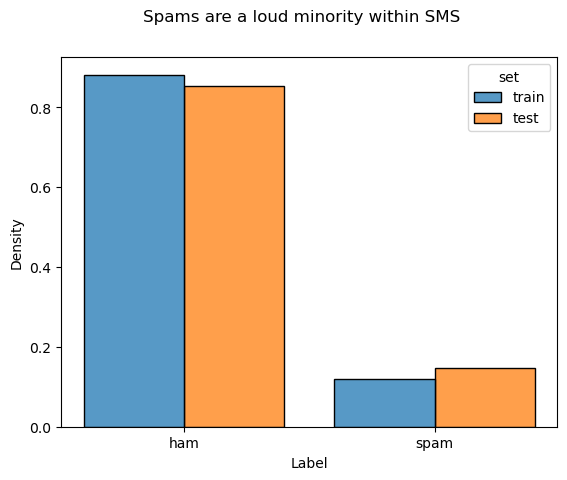

In [44]:
ax=sns.histplot(x=combined['Label'], hue=combined['set'], multiple='dodge', stat='density', shrink=0.8, common_norm=False)
plt.suptitle('Spams are a loud minority within SMS')


In [45]:
print(train_join['Label'].value_counts(dropna=False, normalize=True))
print('--')
print(test['Label'].value_counts(dropna=False, normalize=True))

ham     0.881154
spam    0.118846
Name: Label, dtype: float64
--
ham     0.853682
spam    0.146318
Name: Label, dtype: float64


In [46]:
ham_spam_rate = train_join['Label'].value_counts(dropna=False, normalize=True)[0]/train_join['Label'].value_counts(dropna=False, normalize=True)[1]
ham_spam_rate

7.414285714285715

In [47]:
chars_pivot = combined.pivot_table(index=['Label'], columns=['set'], values=['chars'], aggfunc=np.median)
# sns.countplot(x='Label', hue='set', data=combined)
chars_pivot

chars      
set    test train
Label            
ham      53    53
spam    152   147

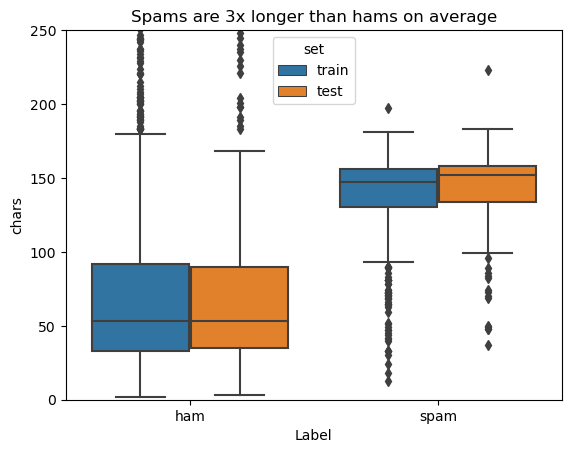

In [48]:
ax = sns.boxplot(x='Label', y='chars', hue='set', data=combined)
plt.ylim([0,250])
plt.title('Spams are 3x longer than hams on average')
plt.show()

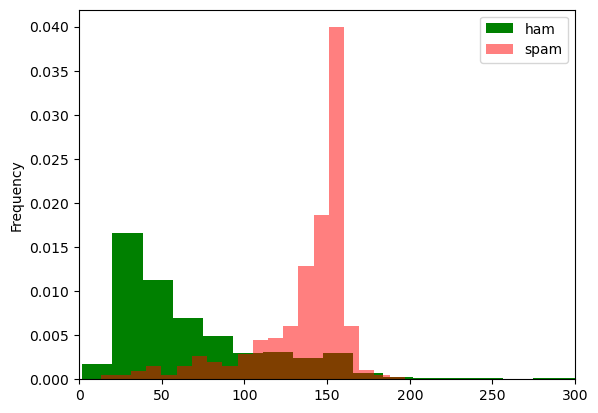

In [49]:
train_split[train_split['Label']=='ham']['chars'].plot.hist( label = 'ham', legend = True, density=True, bins=50, color='g')
train_split[train_split['Label']=='spam']['chars'].plot.hist( label = 'spam', legend = True, density=True, bins=20, color='r', alpha=0.5)
plt.xlim([0,300])
plt.show()

Are these distributions significantly different? Let's check using Kolmogorov-Smirnov Test for two samples, adopting an alpha of 0.05 as a threshold for the p-value.

In [50]:
from scipy.stats import ks_2samp
ks_2samp(train_split[train_split['Label']=='ham']['chars'].values, train_split[train_split['Label']=='spam']['chars'].values)

KstestResult(statistic=0.663973103692344, pvalue=1.0635780654152183e-184, statistic_location=99, statistic_sign=1)

In [51]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(train_split[train_split['Label']=='ham']['chars'].values, train_split[train_split['Label']=='spam']['chars'].values)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=235384.000, p=0.000
Probably different distributions


We can see the corresponding p_value when comparing both distributions is 1.06e-184, which is way less than 0.05. Thus, we reject the null hypothesis, which means they are definitely not the same distribution.

In order to account for the different probabilities of each distribution, we can deploy a Bayesian approach and compute the odds ratio.

Let Θ_ham=(μ_ham,σ_ham)=(70.48,56.96) and similarly for Θ_spam = (138.15,29.53). The probability of coming from either distribution is P(Θ_ham)/P(Θ_spam)=0.870406/0.129594 = 6.716406623763446. What we can calculate is P(Θ_ham|D)/P(Θ_spam|D), where D is the new data point. 

P(Θ_ham|D) = P(D|Θ_ham)* P(Θ_ham)/P(D);
P(Θ_spam|D) = P(D|Θ_spam)* P(Θ_spam)/P(D);

P(Θ_ham|D)/P(Θ_spam|D) = (P(D|Θ_ham)* P(Θ_ham)/ P(D))* P(D)/(P(D|Θ_spam)* P(Θ_spam))
P(Θ_ham|D)/P(Θ_spam|D) = {P(D|Θ_ham)* P(Θ_ham)}/{P(D|Θ_spam)* P(Θ_spam)} = 6.71641 * P(D|Θ_ham)/P(D|Θ_spam)



In [52]:
ham_std = combined[combined['Label']=='ham']['chars'].std(ddof=1)
spam_std = combined[combined['Label']=='spam']['chars'].std(ddof=1)

ham_avg = combined[combined['Label']=='ham']['chars'].mean()
spam_avg = combined[combined['Label']=='spam']['chars'].mean()

print(ham_avg, spam_avg, ham_std, spam_std)

70.91360212671688 137.44929797191887 56.724942498400054 30.016573603804897


In [53]:
def p_ind_dist(ind, the_mean, the_std):
    e=2.718281828459045235360287
    return (1/(the_std*((2*3.1415)**0.5)))*e**((-1)*((ind-the_mean)**2)/(2*the_std**2))

def p_sms_ham(row):
    p_ind_ham = p_ind_dist(row['chars'], ham_avg, ham_std)
    p_ind_spam = p_ind_dist(row['chars'], spam_avg, spam_std)
    odds_ham = ham_spam_rate*p_ind_ham/p_ind_spam
    prob_spam = 1/(odds_ham+1)
    prob_ham = 1-prob_spam
    return prob_ham, prob_spam

train_join[['p_len_ham','p_len_spam']] = train_join.apply(p_sms_ham, axis=1).to_list()
test[['p_len_ham','p_len_spam']] = test.apply(p_sms_ham, axis=1).to_list()

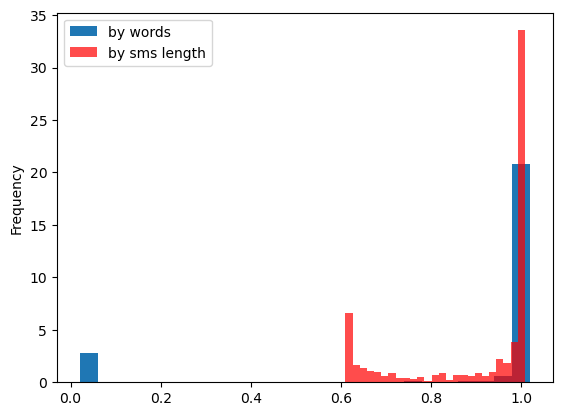

In [54]:
test['p_w_ham'].plot.hist(bins=25, align='right', density=True, label = 'by words')
test['p_len_ham'].plot.hist(bins=25, align='right', density=True, label='by sms length', alpha=0.7, color='r')
plt.legend()
plt.show()
#plt.xticks([0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1])

This is an interesting outcome for the probabilities of SMS being 'ham' according to word probability (blue) and length probability. 

When analyzing length, we could say all sms with a probability lower than ham_spam_rate is likely to be a spam, but then we are left with some uncertainty when both distributions overlap around 100 characters. This chart helps us visualize that the probabilities for being 'ham' cluster around 1 and 0.6. We can add this parameter in the calculation of probabilities when sorting the messages, so our filtering can be improved for the unmatched predictions of the word filter.

To achieve that, we must calibrate a new function to the test dataset, maximizing its accuracy. 

In [55]:
def classify_2(row):
    coef_w = 0.75
    coef_len = 1-coef_w
    ref = train_join['Label'].value_counts(dropna=False, normalize=True)[0]
    if (coef_w*row['p_w_ham']+coef_len*row['p_len_ham']) > ref:
        return 'ham'
    else:
        return 'spam'
# train_join['predicted_2'] = train_join.apply(classify_2, axis=1)        
test['predicted_2'] = test.apply(classify_2, axis=1)

len(test[test['predicted_2']!=test['Label']])

27

This added filter method was not perfect, but we managed to improve an efficient filter in 10%, reducing the misfiltered SMS from 30 to 27 words using an verifiable, palpable metric such as sms length as an extra support to the filter.

## 7. Conclusion<a name="section7"></a>

In this project, we managed to create two functions to classify full SMS messages into spam or ham with tremendous success. The initial accuracy registered was 97.1%, and after accounting for SMS length in our filter, we managed to raise the bar to 97.38%, which is very satisfactory. The spam filter went through 1032 new messages, and scored 1005 correct classifications.

Next steps:

* Try to figure out why the 18 messages got stuck in the filter;
* Make spam filter case sensitive.